In [83]:
'''
Eclipse_Fusion
Paranormal Business
Add your analysis here.

UFO Sightings via: https://www.kaggle.com/datasets/NUFORC/ufo-sightings/data
'''

'\nEclipse_Fusion\nParanormal Business\nAdd your analysis here.\n\nUFO Sightings via: https://www.kaggle.com/datasets/NUFORC/ufo-sightings/data\n'

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sb
import seaborn as sns

# Sightings data files
sightings_path = "Resources/scrubbed.csv"


# Read the scrubbed data, low_memory=False solves the following error:
# DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
aliens_all = pd.read_csv(sightings_path, low_memory=False)


# Display the data table for preview
aliens_all.head()


,year,month,season,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949,10,fall,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,1949,10,fall,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,1955,10,fall,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,1956,10,fall,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,1960,10,fall,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [63]:
# Checking for duplicate entries

alien_dupes = aliens_all[aliens_all.duplicated(subset=["datetime","city"])]
alien_dupes.head()


,year,month,season,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
76,1998,10,fall,10/10/1998 17:30,las vegas,nv,us,circle,2700,45min.,Ufo sighting in las vegas near Area51,8/30/1999,36.175,-115.136389
289,1989,10,fall,10/11/1989 21:00,kewanee,il,us,sphere,300,5 minutes,Reddish-orange sphere seen outside Kewanee&#44 IL,7/26/2002,41.2455556,-89.924722
310,1999,10,fall,10/11/1999 20:15,portville,ny,us,oval,30,30 seconds,Was oval shaped had different colored lights a...,10/19/1999,42.0386111,-78.341111
311,1999,10,fall,10/11/1999 20:15,portville,ny,us,oval,60,1 minute,it was a beautiful oval shaped object that had...,10/19/1999,42.0386111,-78.341111
312,1999,10,fall,10/11/1999 20:15,portville,ny,us,oval,60,1 minute,oval shaped with colorful lights all around wi...,10/19/1999,42.0386111,-78.341111


In [64]:
# Confirming drop_duplicates is working

aliens_clean = alien_dupes.drop_duplicates(subset=["datetime","city"], keep='first')
aliens_clean.head()


,year,month,season,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
76,1998,10,fall,10/10/1998 17:30,las vegas,nv,us,circle,2700,45min.,Ufo sighting in las vegas near Area51,8/30/1999,36.175,-115.136389
289,1989,10,fall,10/11/1989 21:00,kewanee,il,us,sphere,300,5 minutes,Reddish-orange sphere seen outside Kewanee&#44 IL,7/26/2002,41.2455556,-89.924722
310,1999,10,fall,10/11/1999 20:15,portville,ny,us,oval,30,30 seconds,Was oval shaped had different colored lights a...,10/19/1999,42.0386111,-78.341111
463,2013,10,fall,10/11/2013 20:00,cincinnati,oh,us,fireball,240,4 minutes,Cincinnati fire ball in the sky?,10/14/2013,39.1619444,-84.456944
755,2005,10,fall,10/1/2005 0:57,orland park,il,us,light,6,:06,Red lights over Orland Park,10/11/2005,41.6302778,-87.853889


In [65]:
# Finalizing reportable dataframe 

aliens = aliens_all.drop_duplicates(subset=["datetime","city"], keep='first')

# Confirming final dataframe is 1025 less than OG
# (Triple confirmed in excel that the duplicate total was 1915 - cleaned dataset 890 = 1025 duplicate entries)

print(len(aliens_all)-len(aliens))

1025


In [66]:
aliens.head()

,year,month,season,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949,10,fall,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,1949,10,fall,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,1955,10,fall,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,1956,10,fall,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,1960,10,fall,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [67]:
aliens_us = aliens[aliens["country"] == "us"]
aliens_us.head()

,year,month,season,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949,10,fall,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,1956,10,fall,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,1960,10,fall,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,1961,10,fall,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595,-82.188889
7,1965,10,fall,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175,-73.408333


In [68]:
# Dataframe to truncate sightings to last available 20 years of data (1995 to 2014) + add a column for regions
aliens_main = aliens_us[aliens_us["year"] >= 1995]

# Make a copy of the DataFrame
aliens_main = aliens_main.copy()

# Get unique states
unique_states = aliens_main['state'].unique()

# Define mapping of states to regions
state_to_region = {
    'wv': 'South',
    'dc': 'South',
    'md': 'South',
    'va': 'South',
    'ky': 'South',
    'tn': 'South',
    'nc': 'South',
    'ms': 'South',
    'ar': 'South',
    'la': 'South',
    'al': 'South',
    'ga': 'South',
    'sc': 'South',
    'fl': 'South',
    'de': 'South',
    'az': 'Southwest',
    'nm': 'Southwest',
    'ok': 'Southwest',
    'tx': 'Southwest',
    'wa': 'West',
    'or': 'West',
    'ca': 'West',
    'nv': 'West',
    'id': 'West',
    'mt': 'West',
    'wy': 'West',
    'ut': 'West',
    'co': 'West',
    'ak': 'West',
    'hi': 'West',
    'nd': 'Midwest',
    'sd': 'Midwest',
    'ne': 'Midwest',
    'ks': 'Midwest',
    'mn': 'Midwest',
    'ia': 'Midwest',
    'mo': 'Midwest',
    'wi': 'Midwest',
    'il': 'Midwest',
    'mi': 'Midwest',
    'in': 'Midwest',
    'oh': 'Midwest',
    'me': 'Northeast',
    'vt': 'Northeast',
    'ny': 'Northeast',
    'nh': 'Northeast',
    'ma': 'Northeast',
    'ri': 'Northeast',
    'ct': 'Northeast',
    'nj': 'Northeast',
    'pa': 'Northeast'
}

# Add the 'Region' column to the existing DataFrame aliens_main
aliens_main['region'] = aliens_main['state'].str.lower().map(state_to_region)

aliens_main.head()


,year,month,season,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,region
62,1995,10,fall,10/10/1995 19:45,milwaukee,wi,us,NaN,120,2 min.,Man on Hwy 43 SW of Milwaukee sees large&#44 ...,11/2/1999,43.0388889,-87.906389,Midwest
63,1995,10,fall,10/10/1995 22:40,oakland,ca,us,NaN,60,1 minute,Woman repts. bright light in NW sky&#44 sudde...,11/2/1999,37.8044444,-122.269722,West
64,1996,10,fall,10/10/1996 3:20,higginsville,mo,us,triangle,3,3sec,illuminated triangular craft&#44 flying at hig...,2/16/2000,39.0725,-93.716944,Midwest
66,1996,10,fall,10/10/1996 22:00,charleston,sc,us,light,300,5 min,Flashing object above Charleston&#44 SC,11/26/2003,32.7763889,-79.931111,South
67,1996,10,fall,10/10/1996 22:30,monroe county,oh,us,cylinder,60,1 minute,Looked like it went through the hillside,7/8/2004,39.4402778,-84.362222,Midwest


In [69]:
# Question 1: What areas of the country are most likely to have UFO sightings?

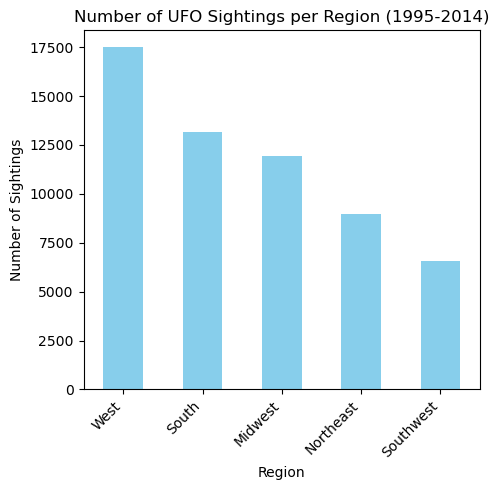

In [70]:
# Q1 Graph 1: Bar - number of sightings by region

# Calculate the number of sightings per region
sightings_per_region = aliens_main['region'].value_counts()

plt.figure(figsize=(5, 5))
sightings_per_region.plot(kind='bar', color='skyblue')
plt.title('Number of UFO Sightings per Region (1995-2014)')
plt.xlabel('Region')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [72]:
# Question 2: Are there any trends in UFO sightings over time in Texas?

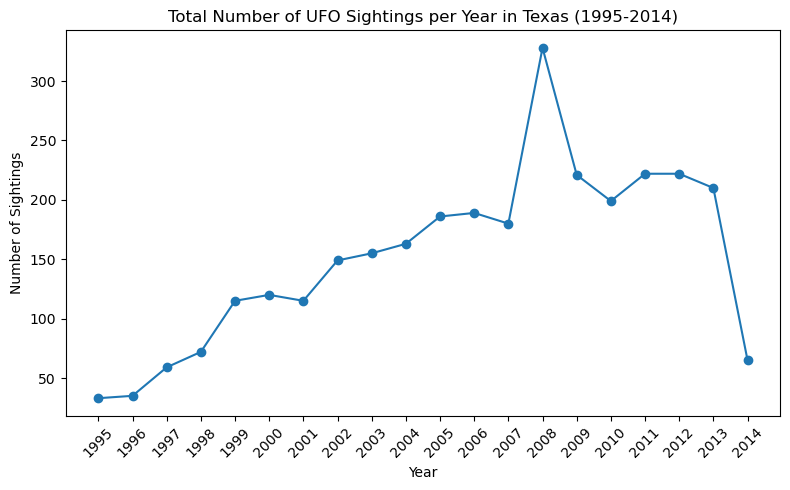

In [73]:
# Q2 Graph 1: Line - number of sightings per year in Texas

# Filter sightings data for Texas
sightings_in_texas = aliens_main[aliens_main['state'] == 'tx']

# Count sightings per year
sightings_per_year = sightings_in_texas['year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(sightings_per_year.index, sightings_per_year.values, marker='o', linestyle='-')
plt.title('Total Number of UFO Sightings per Year in Texas (1995-2014)')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.xticks(sightings_per_year.index, rotation=45)
plt.tight_layout()
plt.show()

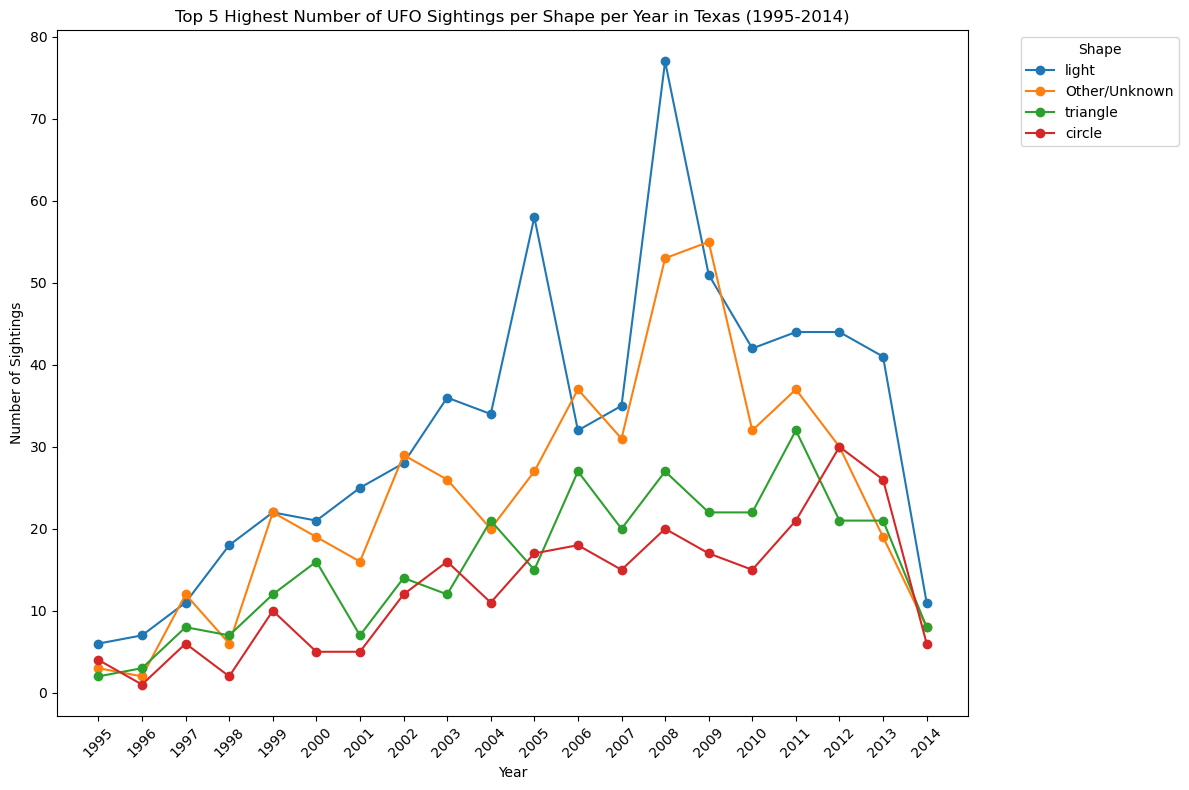

In [74]:
# Q2 Graph 2: Line - shapes of sightings over time in Texas

# Filter sightings data for Texas
sightings_in_texas = aliens_main[aliens_main['state'] == 'tx']

# Count sightings per shape
sightings_per_shape = sightings_in_texas['shape'].value_counts()

# Get top 5 reported shapes
top_shapes = sightings_per_shape.head(5).index

# Filter data to include only top 5 shapes
sightings_in_top_shapes = sightings_in_texas[sightings_in_texas['shape'].isin(top_shapes)]

# Replace 'other' and 'unknown' shapes with a new category 'Other/Unknown'
sightings_in_top_shapes.loc[sightings_in_top_shapes['shape'].isin(['other', 'unknown']), 'shape'] = 'Other/Unknown'

# Group by shape and year, and count sightings
sightings_by_shape_year = sightings_in_top_shapes.groupby(['shape', sightings_in_top_shapes['year']])['year'].count()

# Unstack the multi-index series to get a DataFrame with shapes as columns and years as rows
sightings_by_shape_year_unstacked = sightings_by_shape_year.unstack(level=0)

# Sorting the legend labels based on total number of sightings
legend_labels = sightings_by_shape_year_unstacked.sum().sort_values(ascending=False).index

# Plotting
plt.figure(figsize=(12, 8))
for shape in legend_labels:
    plt.plot(sightings_by_shape_year_unstacked.index, sightings_by_shape_year_unstacked[shape], marker='o', label=shape)

plt.title('Top 5 Highest Number of UFO Sightings per Shape per Year in Texas (1995-2014)')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.legend(title='Shape', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(sightings_per_year.index, rotation=45)
plt.tight_layout()


In [75]:
# Question 3: Is there a certain time of year/season that more sightings occur in Texas?

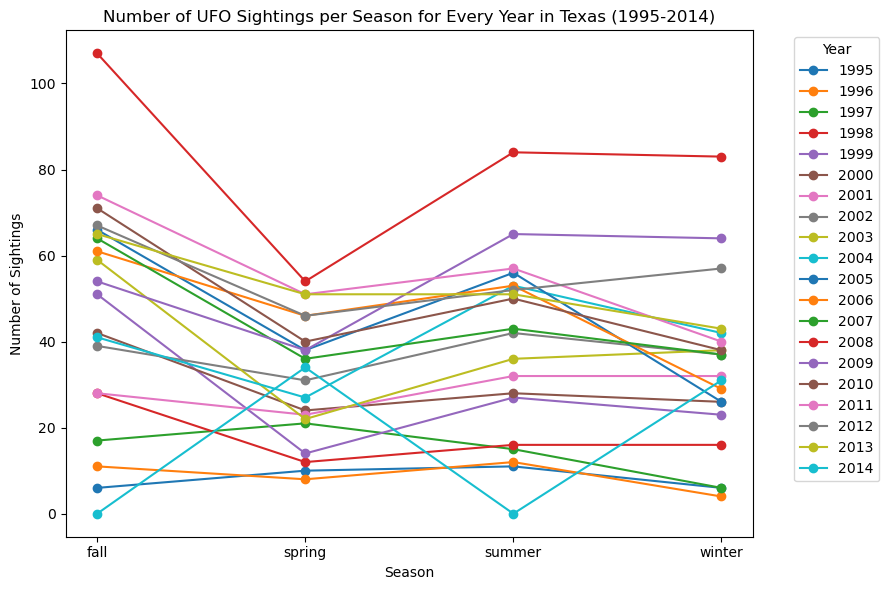

In [76]:
# Q3 Graph 1: Line - season for every year

# Filter sightings data for Texas
sightings_in_texas = aliens_main[aliens_main['state'] == 'tx']

# Group by year and season, and count sightings
sightings_per_year_season = sightings_in_texas.groupby(['year', 'season']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(9, 6))
for year in sightings_per_year_season.index:
    plt.plot(sightings_per_year_season.columns, sightings_per_year_season.loc[year], marker='o', label=year)

plt.title('Number of UFO Sightings per Season for Every Year in Texas (1995-2014)')
plt.xlabel('Season')
plt.ylabel('Number of Sightings')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

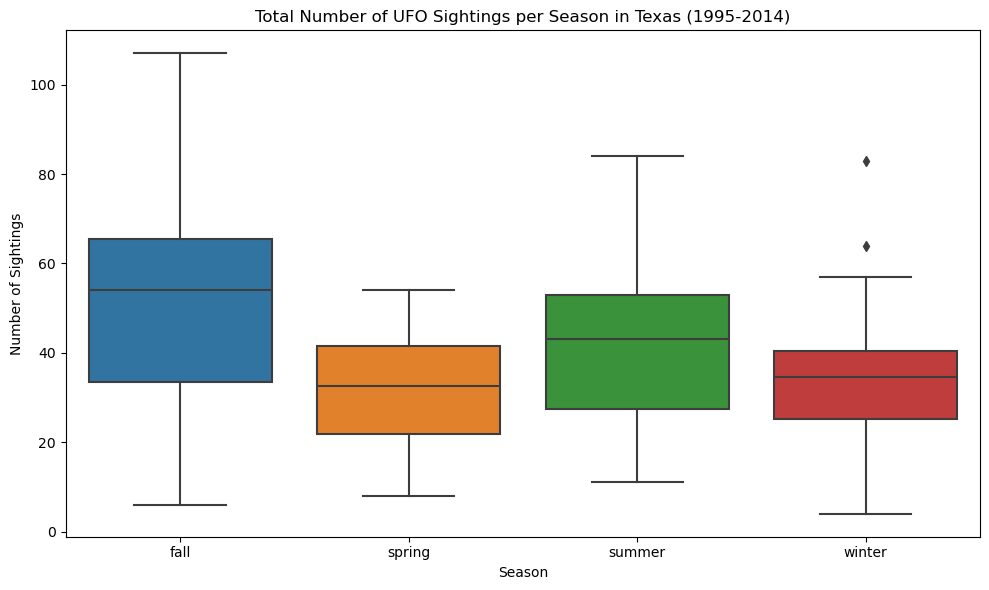

In [78]:
# Filter sightings data for Texas
sightings_in_texas = aliens_main[aliens_main['state'] == 'tx']

# Group by year and season, and count sightings
sightings_per_year_season = sightings_in_texas.groupby(['year', 'season']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(data=sightings_per_year_season, x='season', y='count')
plt.title('Total Number of UFO Sightings per Season in Texas (1995-2014)')
plt.xlabel('Season')
plt.ylabel('Number of Sightings')
plt.tight_layout()
plt.show()

In [18]:
# Introducing GEOAPIFY
''' 
API For Airports https://apidocs.geoapify.com/docs/places/#categories
*In pink*
airport
airport.private
airport.international
airport.gliding
airport.airfield
*In Blue*
airport.military
building.military
'''

' \nAPI For Airports https://apidocs.geoapify.com/docs/places/#categories\n*In pink*\nairport\nairport.private\nairport.international\nairport.gliding\nairport.airfield\n*In Blue*\nairport.military\nbuilding.military\n'

In [19]:
# Q3 Graph 2: Correlating map of sightings and airports or government research centers